# IMPORT LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
X=6*np.random.rand(100,1)-3
Y=0.5*X**2+1.5*X+2+np.random.rand(100,1)

Text(0, 0.5, 'Y-Dataset')

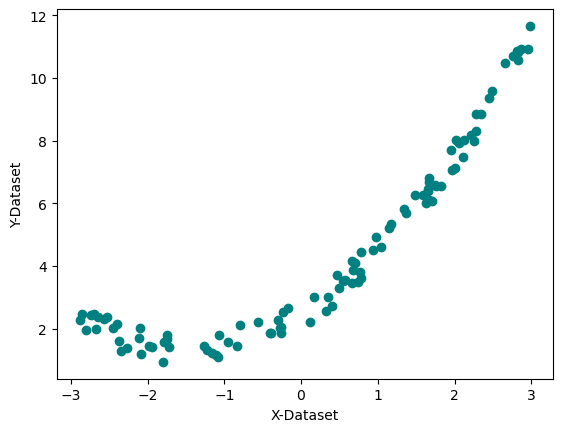

In [22]:
plt.scatter(X,Y,c='teal')
plt.xlabel("X-Dataset")
plt.ylabel("Y-Dataset")

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

In [17]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()

In [18]:
reg.fit(X_train,Y_train)

LinearRegression()

In [20]:
from sklearn.metrics import r2_score
score=r2_score(Y_test,reg.predict(X_test))
print(score)

0.7149280093022177


Text(0, 0.5, 'Y-Dataset')

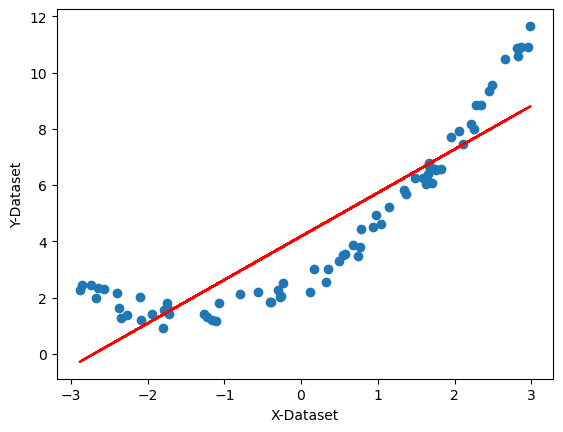

In [23]:
## Visualize
plt.plot(X_train,reg.predict(X_train),c='r')
plt.scatter(X_train,Y_train)
plt.xlabel("X-Dataset")
plt.ylabel("Y-Dataset")

In [25]:
# Lets APPly Polynomials Transformation
from sklearn.preprocessing import PolynomialFeatures

In [26]:
polynomial=PolynomialFeatures(degree=2,include_bias=True)
X_train_poly=polynomial.fit_transform(X_train)
X_test_poly=polynomial.transform(X_test)

In [28]:
X_train_poly

array([[ 1.        ,  1.95712568,  3.83034094],
       [ 1.        ,  2.98964903,  8.93800133],
       [ 1.        ,  0.17036015,  0.02902258],
       [ 1.        , -0.29415298,  0.08652598],
       [ 1.        ,  1.14646263,  1.31437657],
       [ 1.        ,  2.83137088,  8.01666108],
       [ 1.        , -1.72181823,  2.964658  ],
       [ 1.        ,  1.66178101,  2.76151613],
       [ 1.        , -0.38567378,  0.14874427],
       [ 1.        , -2.67229155,  7.14114215],
       [ 1.        ,  1.74748216,  3.0536939 ],
       [ 1.        ,  0.11557352,  0.01335724],
       [ 1.        ,  1.70193606,  2.89658636],
       [ 1.        , -0.22979626,  0.05280632],
       [ 1.        ,  1.48247872,  2.19774315],
       [ 1.        ,  0.54128125,  0.29298539],
       [ 1.        , -2.73422796,  7.47600254],
       [ 1.        , -0.26205321,  0.06867189],
       [ 1.        ,  2.45203686,  6.01248477],
       [ 1.        ,  0.68095824,  0.46370412],
       [ 1.        , -0.40235493,  0.161

In [32]:
from sklearn.metrics import r2_score
regression=LinearRegression()
regression.fit(X_train_poly,Y_train)
Y_pred=regression.predict(X_test_poly)
score=r2_score(Y_test,Y_pred)
print(score)

0.986306597650753


In [35]:
print(regression.coef_)

[[0.         1.49916154 0.50296841]]


In [39]:
print(regression.intercept_)

[2.53123291]


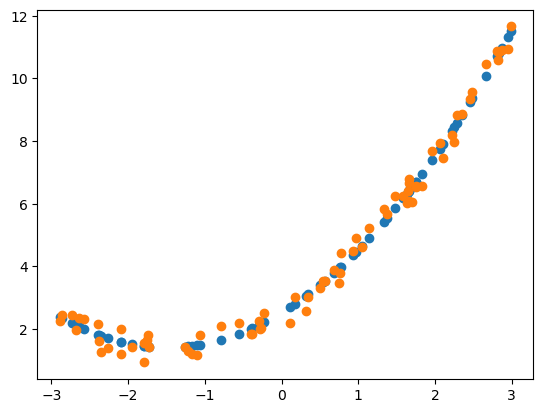

In [42]:
plt.scatter(X_train,regression.predict(X_train_poly))
plt.scatter(X_train,Y_train)

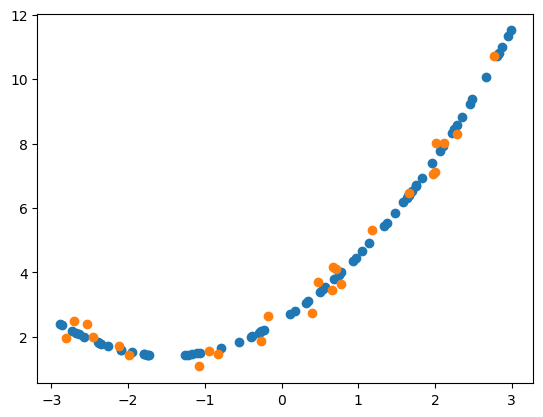

In [44]:
plt.scatter(X_train,regression.predict(X_train_poly))
plt.scatter(X_test,Y_test)

In [46]:
## Prediction of new data
X_new = np.linspace(-3,3,200).reshape(200,1)
X_new_poly = polynomial.transform(X_new)

In [47]:
X_new_poly

array([[ 1.00000000e+00, -3.00000000e+00,  9.00000000e+00],
       [ 1.00000000e+00, -2.96984925e+00,  8.82000455e+00],
       [ 1.00000000e+00, -2.93969849e+00,  8.64182723e+00],
       [ 1.00000000e+00, -2.90954774e+00,  8.46546804e+00],
       [ 1.00000000e+00, -2.87939698e+00,  8.29092700e+00],
       [ 1.00000000e+00, -2.84924623e+00,  8.11820409e+00],
       [ 1.00000000e+00, -2.81909548e+00,  7.94729931e+00],
       [ 1.00000000e+00, -2.78894472e+00,  7.77821267e+00],
       [ 1.00000000e+00, -2.75879397e+00,  7.61094417e+00],
       [ 1.00000000e+00, -2.72864322e+00,  7.44549380e+00],
       [ 1.00000000e+00, -2.69849246e+00,  7.28186157e+00],
       [ 1.00000000e+00, -2.66834171e+00,  7.12004747e+00],
       [ 1.00000000e+00, -2.63819095e+00,  6.96005151e+00],
       [ 1.00000000e+00, -2.60804020e+00,  6.80187369e+00],
       [ 1.00000000e+00, -2.57788945e+00,  6.64551400e+00],
       [ 1.00000000e+00, -2.54773869e+00,  6.49097245e+00],
       [ 1.00000000e+00, -2.51758794e+00

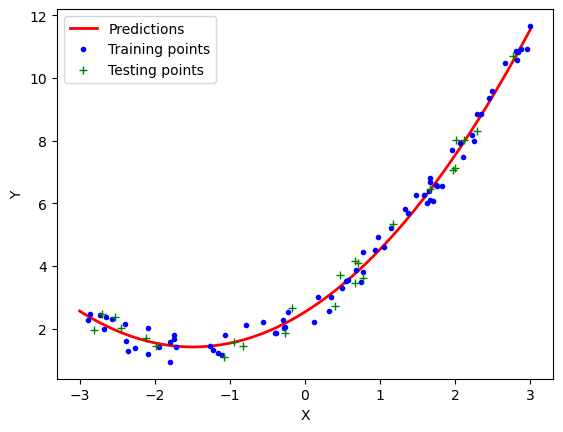

In [50]:
Y_new=regression.predict(X_new_poly)
plt.plot(X_new,Y_new,"r-",linewidth=2,label="Predictions")
plt.plot(X_train,Y_train,"b.",label="Training points")
plt.plot(X_test,Y_test,"g+",label="Testing points")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

#  Pipeline Concepts for Polynomial Regression

In [65]:
from sklearn.pipeline import Pipeline
def poly_regression(degree):
    X_new = np.linspace(-3, 3, 200).reshape(200, 1)
    
    poly_features=PolynomialFeatures(degree=degree,include_bias=True)
    lin_reg=LinearRegression()
    poly_regression=Pipeline([
        ("poly_features",poly_features),
        ("lin_reg",lin_reg)
    ])
    poly_regression.fit(X_train,Y_train) ## ploynomial and fit of linear reression
    Y_pred_new=poly_regression.predict(X_new)
    #plotting prediction line
    plt.plot(X_new, Y_pred_new,'r', label="Degree " + str(degree), linewidth=2)
    plt.plot(X_train, Y_train, "b.", linewidth=3)
    plt.plot(X_test, Y_test, "g+", linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-4,4, 0, 10])
    plt.show()
    

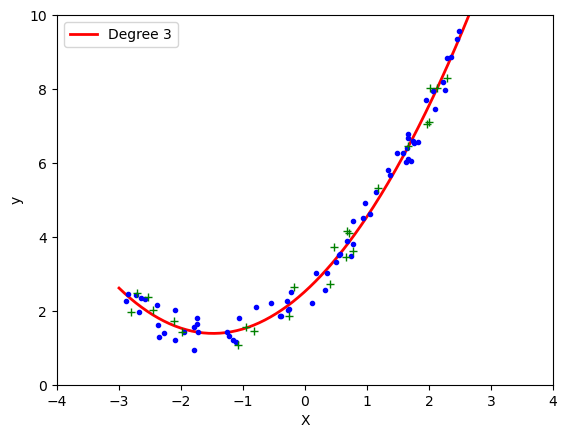

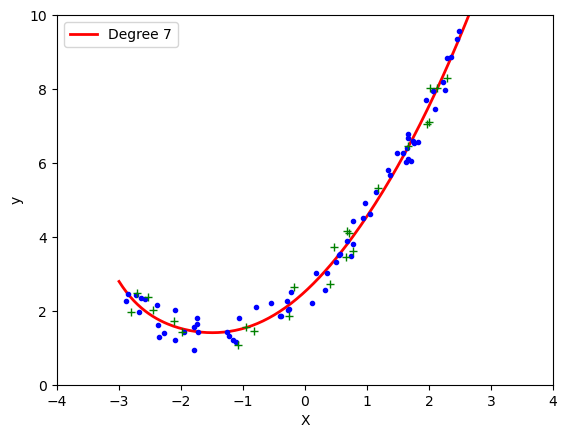

(None, None)

In [86]:
poly_regression(3),poly_regression(7)
